In [ ]:
# pip install sturdy-stats-sdk pandas numpy plotly

from sturdystats import Index, Job
import pandas as pd
import numpy as np

API_KEY = None
index_id = "index_05a7cb07da764f0f81397b39ce65ab06" ## Optionally Replace with your own if you want

index = Index(API_key=API_KEY, id=index_id)

# Section 1: The Basics

Our query api allows you to perform a semantic search

In [94]:
res = index.query(search_query="ai")
docs = res["docs"]
doc = docs[0]
print(doc.keys())
print(doc["metadata"].keys())

dict_keys(['doc_id', 'metadata', 'nu_score', 'paragraph_id', 'predictions', 'text', 'topics'])
dict_keys(['author', 'clf_predictions', 'doc', 'doc_id', 'nu_quarter', 'nu_ticker', 'ordered_doc_index', 'paragraph_start_inds', 'priceDelta', 'published', 'quarter', 'sum_topic_counts', 'ticker', 'title', 'year'])


### Each Doc has the most relevant paragraph extracted
You can extract the most relevent paragraph. You can also provide a `context` int of size size 0->inf of how many paragraph above or below the selected excerpts to return

In [59]:
for doc in docs[:3]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Content:", doc["text"])
    print("")

Title: MSFT 2024Q2
Published: 2024-04-25
Content: Keith Weiss: Thank you, guys for taking the question and congratulations on a fantastic quarter. A lot of excitement in the marketplace around generative AI and the potential of these technologies, but there’s also a lot of investment going on behind them. It looks like Microsoft is on track to ramp CapEx over 50% year-on-year this year to over $50 billion. And there’s media speculation of more spending ahead with some reports talking about like $100 billion data center. So obviously, investments are coming well ahead of the revenue contribution. But what I was hoping for is that you could give us some color on how use as the management team, try to quantify the potential opportunities that underlie these investments because they are getting very big. And maybe if you could give us some hint on whether there's any truth to the potential of like $100 billion data center out there? Thank you so much.


Title: AAPL 2024Q2
Published: 2024-0

#### Beyond individual documents

You can also perform search on the corpus as a whole. In order to support arbitrarily complex quantitative operations, we support SQL for query analysis. 

The `topicDiff` api pulls out the topics that are statistically significantly more prevalent in excerpts that contain `ai` compared to excerpts that do not contain `ai`. The parameter `q1` defines the group you are interested in and the parameter `q2` defines the group against which you want to compare q1.  

In [353]:
q1 = "search('ai')"
topic_df = pd.DataFrame(index.topicDiff(q1=q1, q2=f"NOT ({q1})", limit=50 )["topics"])
topic_df.head(5)[["short_title", "topic_group_short_title", "confidence", "prevalence"]]

,short_title,topic_group_short_title,confidence,prevalence
0,AI Cloud Services,AI Innovations,100,0.062975
1,AI Interaction and Engagement,Artificial Intelligence,100,0.060210
2,Microsoft Business Solutions,Microsoft Developments,100,0.046305
3,AI-Driven Data Processing,AI Innovations,100,0.034608
4,Generative AI Infrastructure,AI Innovations,100,0.033745


##### Each topic 
is tagged with a `short-title`, a `one_sentence_summary` and an `executive_paragraph_summary`

In [354]:
row = topic_df.sample().iloc[0]
print("Title:", row.short_title)
print("Sentence:", row.one_sentence_summary)
print("Summary:", row.executive_paragraph_summary)

Title: AI Infrastructure Investment
Sentence: Organizations are significantly investing in AI infrastructure to scale their systems and enhance performance through advanced models and architectures.
Summary: The theme revolves around the escalating investments in AI infrastructure to develop and deploy advanced AI models and services. As organizations seek to lead in the AI space, they are focusing on building capacity to support larger datasets and sophisticated model architectures, which historically had limitations in scaling performance. Examples illustrate how companies like Meta are implementing new ranking systems informed by scaling laws, deploying state-of-the-art open-sourced models, and enhancing operational efficiency across their products. This commitment to infrastructure is positioned as a strategic priority for unlocking significant improvements in service offerings while efficiently managing resources in anticipation of growing AI usage.


#### Each topic

Also contains a field titled `prevalence`.

`prevalance` describes the percentage of the set of data in which you are interested (`q1`) that that topic makes up. This is extremely useful for data visualizations


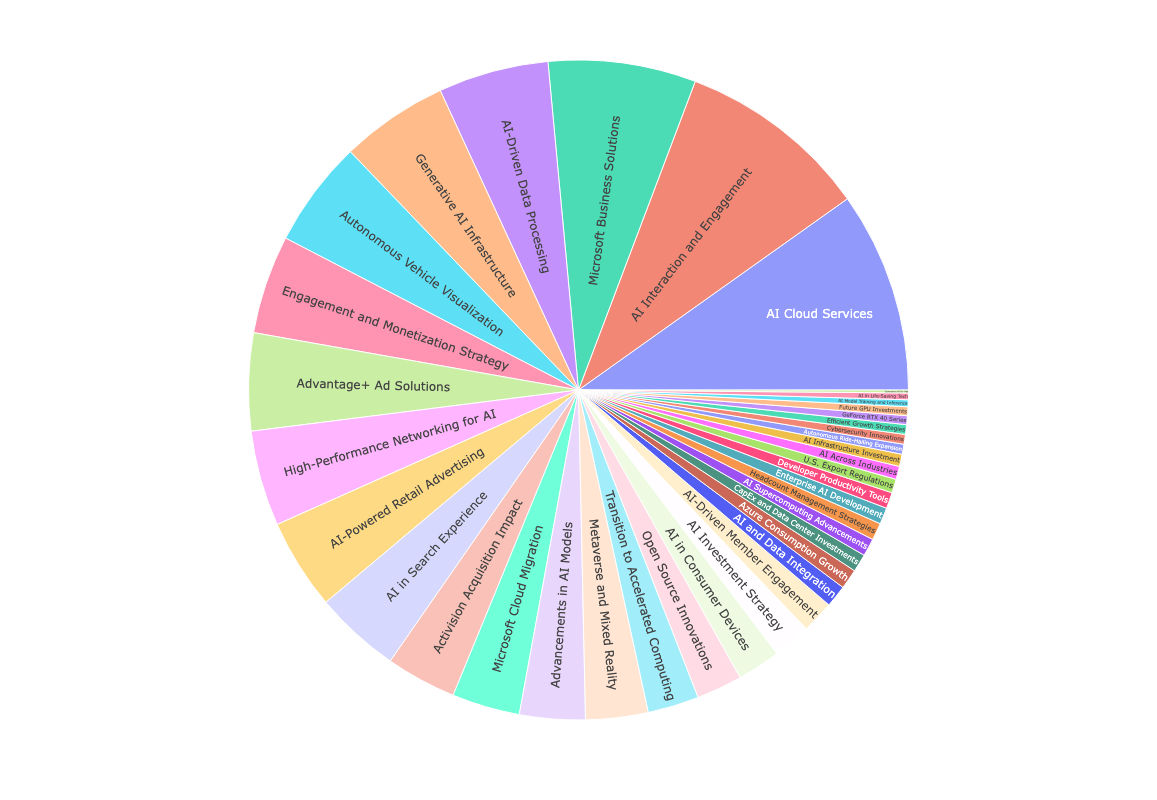

In [357]:
import plotly.express as px
%matplotlib inline

## Note the size if each pie slice is the prevalence of the topic
fig = px.sunburst(topic_df, path=["short_title"], values="prevalence", hover_data=["one_sentence_summary", "topic_id"])
fig.update_layout(width=800, height=800)
fig.show()

#### Topics are organized into topic groups
These topic groups to provide high-level organization on top of our extremely granular set of topics. 

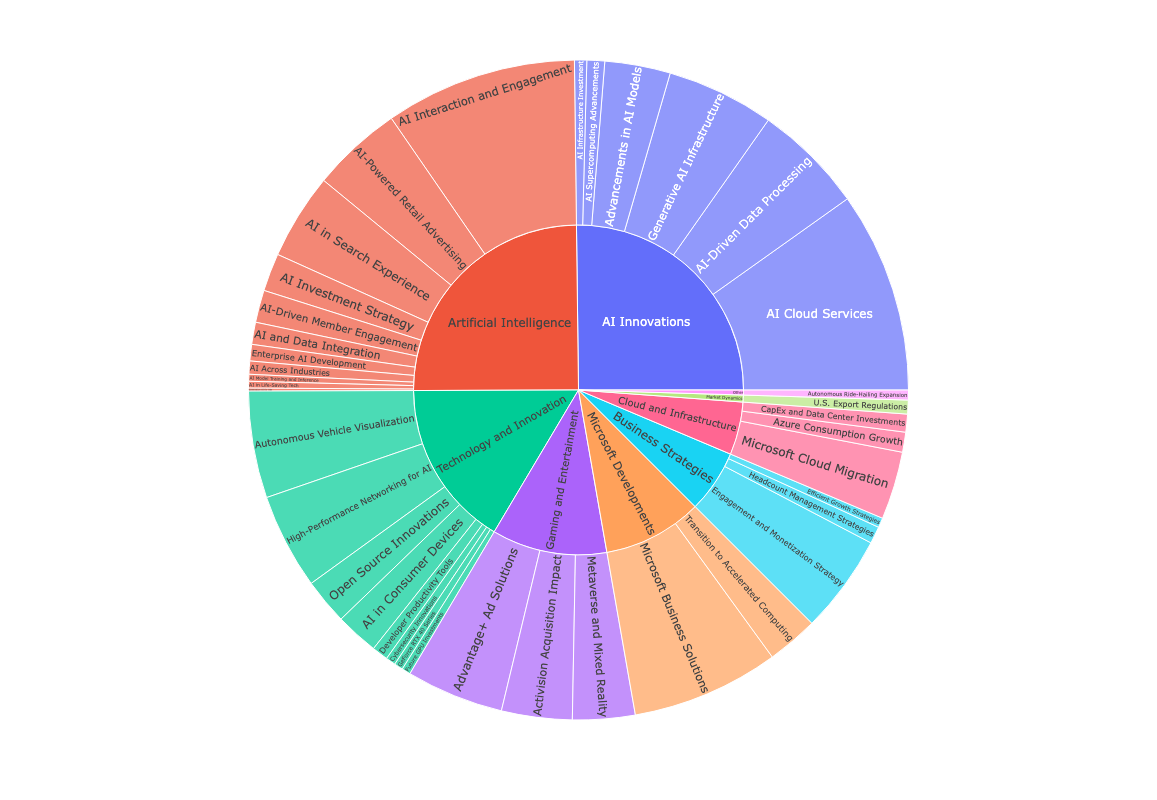

In [358]:
fig = px.sunburst(topic_df, path=["topic_group_short_title", "short_title"], values="prevalence", hover_data=["topic_id"] )
fig.update_layout(width=800, height=800)
fig

# Section 2: A Topic Caught my Eye 
AI-Powered Retail Advertising. Topic 77 (the id is visible when hovering over the sunburst).

In [359]:
topic_id = 77
row = topic_df.loc[topic_df.topic_id == topic_id].iloc[0]
print("Title:", row.short_title)
print("Summary:", row.executive_paragraph_summary)

Title: AI-Powered Retail Advertising
Summary: Recent discussions highlight the transformative role of AI in optimizing retail advertising strategies, focusing on the use of tools like Performance Max (PMax) and DemandGen to streamline workflows, enhance creative asset production, and drive higher conversion rates. Retailers are witnessing substantial improvements in return on ad spend (ROAS), with notable success stories including increased omni-channel revenue for a U.S. big-box retailer and significantly higher conversion rates for a global fashion brand. Advanced AI solutions aid in media buying processes, enabling advertisers to test varied creatives, while improvements to local inventory ads have boosted shopper confidence. Moreover, tools like virtual try-ons and optimized bidding strategies ensure that retailers remain competitive during critical shopping seasons, ultimately creating a more seamless experience for consumers.


#### Summaries are helpful but ...
the original data with examples are where the real work is done.

Fortunately, hopping between topics and documents is seamless

In [98]:
docs = index.query(topic_id=topic_id)["docs"]
for doc in docs[:3]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Content:", doc["text"])
    print("")

Title: GOOG 2024Q3
Published: 2024-07-23
Content: Across Search, PMax, DemandGen, and Retail, we're applying AI to streamline workflows, enhance creative asset production, and provide more engaging experiences for consumers. Listening to our customers, retailers in particular have welcomed AI-powered features to help scale the depth and breadth of their assets. For example, as part of a new and easier-to-use merchant center, we've expanded Product Studio, with tools that bring the power of Google AI to every business owner. You can upload a product image from the AI with something like, feature this product with Paris skyline in the background and Product Studio will generate campaign ready assets. I also hear great feedback from our customers on many of our other new AI-powered features. We're beta testing, virtual try on and shopping ads and plan to roll it out widely later this year. Feedback shows this feature gets 60% more high-quality views than other images and a higher click-ou

####  Examples are helpful but ...
I now want to ask some more high level questions ...

Google seems to be releasing a suite of tools leveraging Gemini for helping companies build advertisements. I want to know when this started and how focused the earnings calls have been on this product line each quarter. 

Because our model statistically structures unstructured data at the word, sentence, paragraph, document and corpus level, we can actually just run basic sql queries as if our unstructured data was simply another quantitative field. 

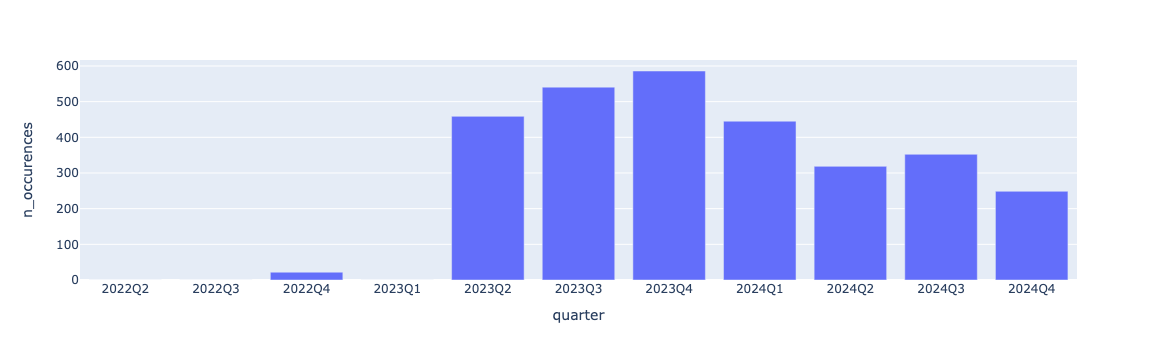

In [88]:
# Arrays are 1 indexed in our sql data store
df = pd.DataFrame(index.queryMeta(f"""
SELECT quarter, sum(sum_topic_counts[{topic_id+1}]) as n_occurences
FROM doc_meta GROUP 
BY quarter ORDER BY quarter""") )

px.bar(df, x="quarter", y="n_occurences")

#### Clearly this is a newer product line
It seems to start in 2023Q2 and has been a pretty heavy focus since then. I can see in 2023Q4 it was a major focus. Let's bring up those examples

In [87]:
docs = index.query(topic_id=topic_id, filters="quarter='2023Q4'")["docs"]
for doc in docs[:3]:
    print("Title:", doc["metadata"]["title"])
    print("Published:", doc["metadata"]["published"])
    print("Content:", doc["text"])
    print("")

Title: GOOG 2023Q4
Published: 2023-10-24
Content: I'll highlight more ways we're innovating with the best of Google AI as we double-click into our core business. In Retail, we had a great quarter. In a market where every dollar counts, our proven AI-powered solutions like Search and PMax are helping retailers drive reliable, strong ROI and meet customers wherever they are across the funnel. In Q3, we also started prepping retailers for what will be a long holiday season. Let me share some things. Number one, with a maximum number of days between Thanksgiving and Christmas and expectations for many micro peaks beyond Cyber-Five, we're arming businesses with insights and planning tools, including OptiScore and Performance Planner to uncover new opportunities, plan budgets and targets to stay competitive and be smarter with their inventory and pricing strategy. Number two. Consumer expectations are shifting, especially around price and convenience. We've seen 4x deals queries during the h

### What's META doing there??
I guess Google is not the only big AI advertiser in the market.

Let's revisit our previous visualization. From the initial examples, I assumed google was the only company to whom this topic applied. But my old graphic was more of an industry analysis than a google based analysis. Let's this time stratify by company.

/Users/kian/miniconda3/envs/py11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



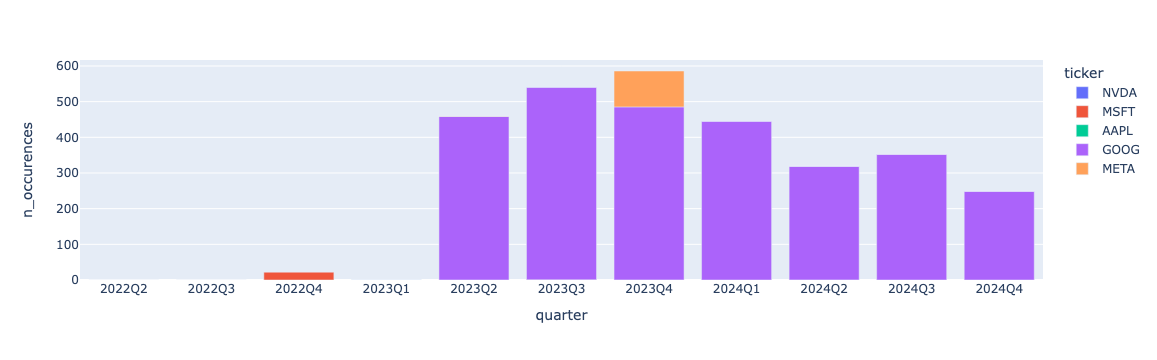

In [93]:
# Arrays are 1 indexed in our sql data store
df = pd.DataFrame(index.queryMeta(f"""
SELECT quarter, ticker, sum(sum_topic_counts[{topic_id+1}]) as n_occurences
FROM doc_meta 
GROUP BY quarter, ticker
ORDER BY quarter""") )

px.bar(df, x="quarter", y="n_occurences", color="ticker").show()

#### My initial assumption was not too far off. 
It's very interesting to see facebook starting to get in on the action. But this product line is clearly its not as interesting to meta's investors is it is Google's.


####  Lets compose our above work into some nice helper functions

In [263]:
def topicOverTime(topic_id, ticker):
    # Arrays are 1 indexed in our sql data store
    df = pd.DataFrame(index.queryMeta(f"""
    SELECT quarter, sum(sum_topic_counts[{topic_id+1}]) as n_occurences
    FROM doc_meta 
    WHERE ticker='{ticker}'
    GROUP BY quarter 
    ORDER BY quarter""") )
    df["topic_id"] = topic_id
    return df

def displayDocs(topic_id, quarter, ticker):
    docs = index.query(topic_id=topic_id, filters=(f"quarter='{quarter}' AND " if quarter is not None else "") + f"ticker='{ticker}'")["docs"]
    for doc in docs[:3]:
        print("Title:", doc["metadata"]["title"])
        print("Published:", doc["metadata"]["published"])
        print("Content:", doc["text"])
        print("")

# Section 3: Corpus Level Analysis

Instead of analyzing a topic across quarters, what if we could analyze quarters across topics. Specifically, let's answer the question: What was noteworthy about each quarter. This will provide us a much richer visualization as a jumping off point for as many topic specific analyses we could want.

/Users/kian/miniconda3/envs/py11/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



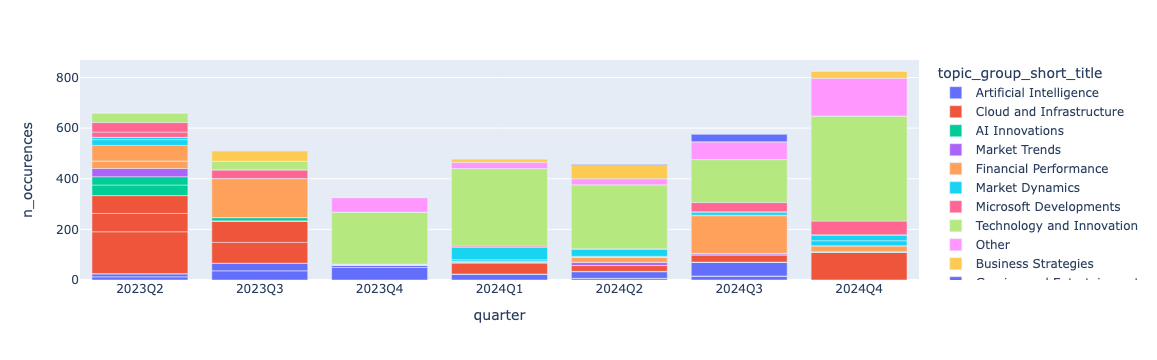

In [360]:
ticker = "GOOG"
quarters = pd.DataFrame(index.queryMeta(f"SELECT distinct(quarter) from doc_meta WHERE ticker='{ticker}'")).quarter
        

## This query compares one of google's quarters to all other quarters to pull out what made it distinct
## An alternative approach could be comparing the quarter only to those that came before it
## The api provides the ability to compare any 1 group to any other group and provides 
## The same high level structured overview
dfs = []
for q in quarters:
    tmp = pd.DataFrame(index.topicDiff(
        q1=f"ticker='{ticker}' AND quarter='{q}'", 
        q2=f"ticker='{ticker}' AND quarter!='{q}'",
        cutoff=1.0,
        limit=100
    )["topics"])
    tmp["quarter"] = q
    dfs.append(tmp)
topic_df = pd.concat(dfs).sort_values("quarter")
counts_df = pd.concat([ topicOverTime(t, ticker) for t in df.topic_id.unique() ])

df = pd.merge(counts_df, topic_df.drop_duplicates(subset="short_title").drop(columns="quarter"), on="topic_id")
px.bar(df, x="quarter", y="n_occurences", color="topic_group_short_title", hover_data=["short_title", "topic_id"])

### Tying it all together

We can now seamlessly slice our data across any angle and include high level topics in our quantitative data analysis. If any topic is of interest we can immediately pull up the the relevent portion of the document, see connections across companies and quarters. Essentially, we now have a framework to quantitatively analyze and fly through any unstructured dataset.

Title: Autonomous Ride-Hailing Expansion


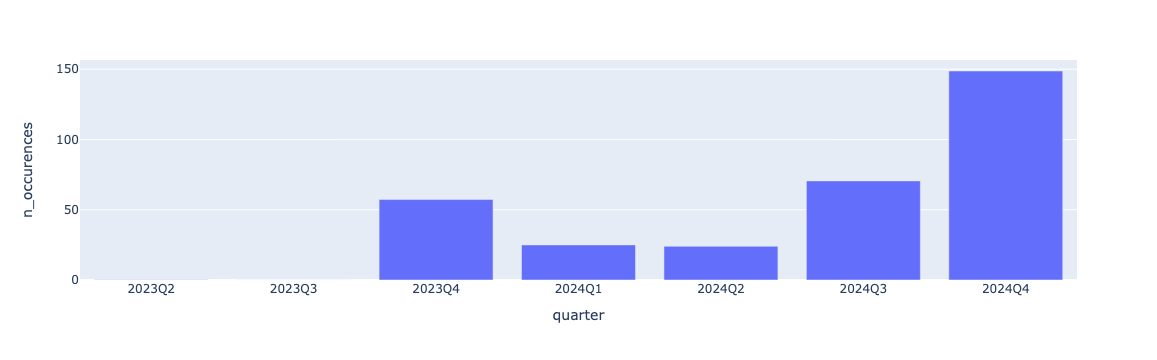

Title: GOOG 2024Q4
Published: 2024-10-29
Content: At Made by Google, we unveiled our latest Pixel 9 series of devices featuring advanced AI models, including Gemini Nano. We have seen strong demand for these devices, and they've already received multiple awards. Turning to Other Bets. I want to highlight Waymo, the biggest part of our portfolio. Waymo is now a clear technical leader within the autonomous vehicle industry and creating a growing commercial opportunity. Over the years, Waymo has been infusing cutting-edge AI into its work. Now each week, Waymo is driving more than 1 million fully autonomous miles and serves over 150,000 paid rides. The first time any AV company has reached this kind of mainstream use. Through its expanded network and operations partnership with Uber in Austin and Atlanta, plus a new multiyear partnership with Hyundai, Waymo will bring fully autonomous driving to more people and places. By developing a universal driver, Waymo has multiple paths to market. 

In [361]:
topic_id = 69
row = topic_df.loc[topic_df.topic_id == topic_id].iloc[0]
print("Title:", row.short_title)
px.bar(topicOverTime(topic_id, ticker), y="n_occurences", x="quarter").show()
displayDocs(topic_id, "2024Q4", ticker)